In [1]:
import warnings 
warnings.filterwarnings('ignore')
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2

In [2]:
img_zip = 'dataset.zip'
with ZipFile(img_zip,'r') as z:
    print('Extracting all the image')
    z.extractall()

Extracting all the image


In [3]:
X =[]
for path in z.namelist():
    if path == 'P_D_DETECTION/parkinsons_dataset/normal/' or path == 'P_D_DETECTION/parkinsons_dataset/parkinson/': 
        pass
    else:
        X.append(path)

In [4]:
# Number of image in the dataset
len(X)

831

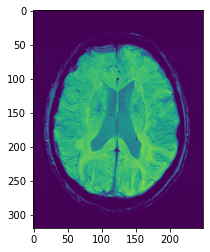

In [5]:
# Ploting a certain image from the dataset
figure = plt.imread(X[350])
plt.imshow(figure)
plt.show()

In [6]:
#Converting the images into the array and getting image to same shape
for i, f in enumerate(X):
    img = cv2.imread(f) # open the image path
    img = cv2.resize(img,dsize=(256,256))
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X[i] = np.array(im_rgb)
X = np.array(X)

In [7]:
# Normalize the data
X = X.astype('float32')
X = X/255.

In [8]:
print(f'Shape of X is {X.shape}')

Shape of X is (831, 256, 256, 3)


In [9]:
# Exporting the Y-label file
df = pd.read_csv('y_label.csv', names=['Label'])
y_label = np.array(df)
print(f'Shape of Y-label is {y_label.shape}')

Shape of Y-label is (831, 1)


In [10]:
# Coverting categorically variable into Numerical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_label = le.fit_transform(y_label)

In [11]:
# Converting the class vectors (integers) to binary class matrix
import tensorflow as tf
y_label = tf.keras.utils.to_categorical(y_label,num_classes=2)
print(f'Shape of y_class{y_label.shape}')
print(f'One value of y_class{y_label[0]}')

Shape of y_class(831, 2)
One value of y_class[1. 0.]


In [12]:
# Slpitting the X and Y label to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y_label, test_size=0.2, random_state=10)
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')

Shape of X_train:(664, 256, 256, 3)
Shape of y_train:(664, 2)
Shape of X_test:(167, 256, 256, 3)
Shape of y_test:(167, 2)


# Model_3

In [13]:
from keras.models import model_from_json

# load json and create model
json_file = open('Model_3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_3 = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_3.load_weights("Model_3.h5")

In [14]:
loaded_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 128)     3584      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 128)     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 125, 64)      73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 60, 60, 16)        9232      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 14400)            

In [15]:
# adam = Adam(learning_rate=0.00003)
loaded_model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model_3.evaluate(X_test, y_test, verbose=0)
print ("%s: %.2f%%" % (loaded_model_3.metrics_names[1], score[1]*100))

accuracy: 94.61%


In [17]:
print ("%s: %.2f%%" % (loaded_model_3.metrics_names[0], score[0]*100))

loss: 17.28%


In [18]:
print('Pred 144')
print(loaded_model_3.predict(X_test).round()[144])
print(y_test[144])

Pred 144
[1. 0.]
[1. 0.]


#  Vgg16 model

In [19]:
from keras.models import model_from_json

# load json and create model
json_file = open('Model_6.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
vgg_model = model_from_json(loaded_model_json)
# load weights into new model
vgg_model.load_weights("Model_6.h5")

In [20]:
vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [21]:
adam = Adam(learning_rate=0.00003)
vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = vgg_model.evaluate(X_test, y_test, verbose=0)
print ("%s: %.2f%%" % (vgg_model.metrics_names[1], score[1]*100))

accuracy: 98.80%


In [22]:
print ("%s: %.2f%%" % (vgg_model.metrics_names[0], score[0]*100))

loss: 5.00%


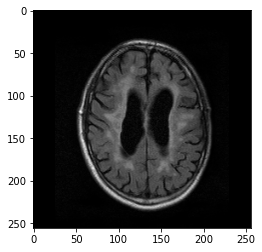

In [23]:
plt.imshow(X_test[55])
plt.show()

In [24]:
# Vgg16 tuned(Best model)
print(vgg_model.predict(X_test).round()[55])
print(y_test[55])

[0. 1.]
[0. 1.]


- compairing model 3(cnn_model) and model 6(vgg16_model) we can see that vgg16 has higher accuracy and less loss values, thus we will choose vgg16 model for predicting the classification task

In [25]:
def Prediction(Pred):
    if (Pred==1):
        print("The Patient has Parkinson's Disease")
#         plt.imshow(img)
#         plt.show()
    elif(Pred==0):
        print('Normal Patient')
#         plt.imshow(img)
#         plt.show()

# Prediction with Vgg16 model

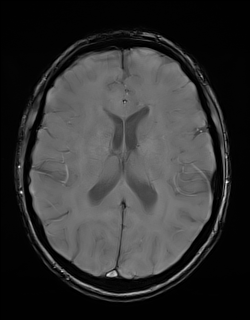

In [26]:
image=tf.keras.preprocessing.image.load_img("n8.png")
image

In [27]:
image = tf.keras.preprocessing.image.img_to_array(image)
# print(image.shape)
image=tf.image.resize(image,(256,256))
print(image.shape)
image = np.expand_dims(image, axis = 0)

(256, 256, 3)


In [28]:
np.argmax(vgg_model.predict(image))

0

In [29]:
Prediction(np.argmax(vgg_model.predict(image)))

Normal Patient


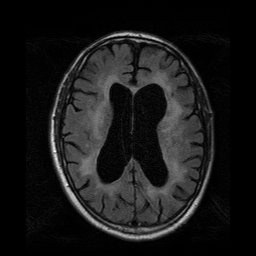

In [30]:
image=tf.keras.preprocessing.image.load_img("p8.png")
image

In [31]:
image = tf.keras.preprocessing.image.img_to_array(image)
image=tf.image.resize(image,(256,256))
print(image.shape)

(256, 256, 3)


In [32]:
image = np.expand_dims(image, axis = 0)

In [33]:
np.argmax(vgg_model.predict(image))

1

In [34]:
Prediction(np.argmax(vgg_model.predict(image)))

The Patient has Parkinson's Disease
